## 단일표본 t검정

분산 $\sigma^2$을 정확히 알고 있는 상황에서는 단일표본 z검정을 이행해 정규분포의 표본의 기댓값을 조사할 수 있다.

다만 현실적으로 분산값을 정확히 아는 경우는 없기에 **표본표준편차 $s$**를 이용해 단일표본 t검정을 진행한다.

> 단일표본 t검정은 정규분포의 표본에 대해 기댓값을 조사하는 검정 방법이다. 검정 통계량으로 스튜던트 t분포를 가진 t통계량을 사용한다.

$$\dfrac{\bar{x} - \mu_0} {\dfrac{s}{\sqrt{N}}}$$

`scipy.stats.ttest_1samp(a, popmean)`

- a : 표본 데이터 배열
- popmean : 귀무가설의 기댓값

데이터 수 N=10, 실제모수 $\mu_0$=0인 경우에 대해 단일표본 t검정

In [1]:
import scipy as sp
import scipy.stats

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


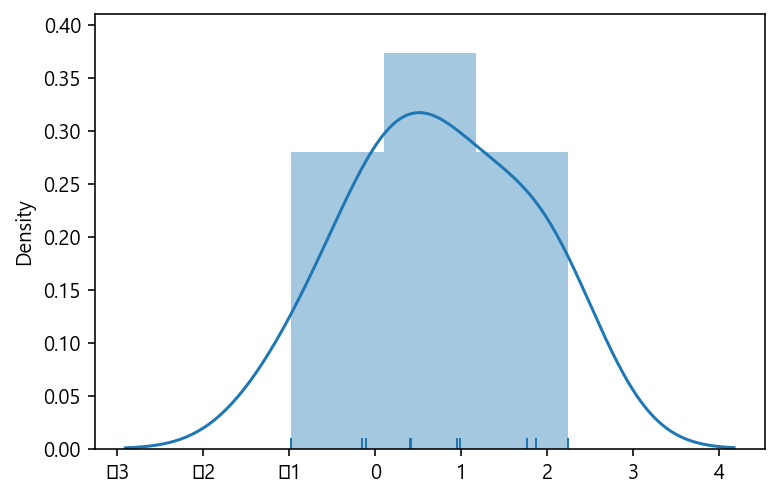

In [19]:
N = 10
mu_0 = 0

np.random.seed(0)

# 기댓값이 0인 정규분포를 따르는 샘플 10개 생성
x = sp.stats.norm(mu_0).rvs(N)
print(x)

sns.distplot(x, rug=True)
sp.stats.ttest_1samp(x, popmean=0)

위 단일표본 t검정을 진행한 결과 유의확률이 4.7%로 나타났다.

단일표본 t검정을 수행한 x 데이터는 실제로 기댓값이 0인 정규분포에서 샘플링한 데이터였고 t검정에 지정한 모수값은 0이었다.

그런데도 불구하고 유의수준이 5% 이상이라면 귀무가설을 기각할 수 있다. 따라서 모수값이 0인 정규분포에서 나온 샘플데이터를 이용해 t검정을 진행했지만 모수값이 0인 정규분포에서 나온 데이터가 아니라는 결론을 내릴 수 있다.

이러한 상황을 **1종오류**라고 한다. 이 경우 데이터 갯수가 부족해 이러한 상황이 발생한 것이다.

이번에는 N=100으로 지정해서 단일표본 t검정을 다시 진행해보자.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Ttest_1sampResult(statistic=-0.5056472406953139, pvalue=0.6142283032405866)

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


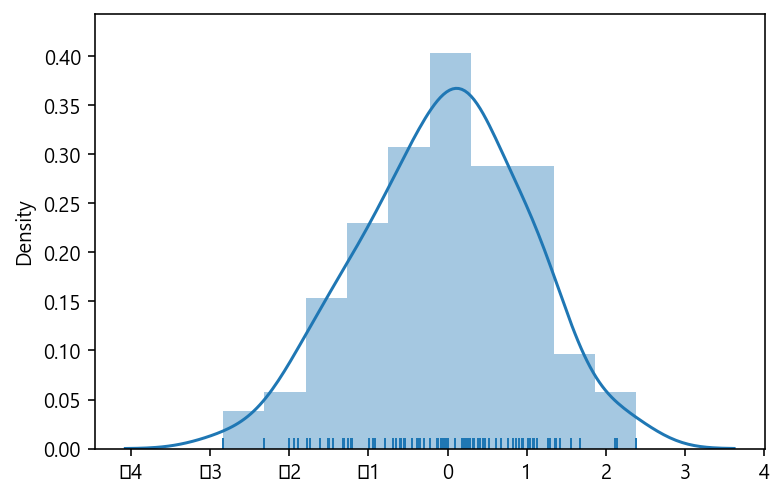

In [23]:
N = 100
mu_0 = 0

# 기댓값이 0인 정규분포를 따르는 샘플 100개 생성
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, rug=True)

sp.stats.ttest_1samp(x, popmean=0)

N을 100으로 증가시킨 결과 히스토그램 또한 부드러운 정규분포에 가까워졌고 유의확률 또한 61%로 상당히 높아졌음을 확인할 수 있다.

따라서 이 경우 popmean의 인수로 넘긴 0이라는 모수를 가진 정규분포라는 귀무가설이 채택될 수 있다.

## 독립표본 t검정

독립표본 t검정은 두 독립적인 정규분포에서 나온 $N_1, N_2$개의 데이터셋을 사용해 두 정규분포의 기댓값이 동일한지를 검사하는 검정이다.

`sp.stats.ttest_inds(a, b, eqaul_var=True)`

- a : 1번 표본 집합 데이터
- b : 2번 표본 집합 데이터
- equal_var : 두 표본 집합의 분산이 같은 경우 True (등분산 검정 결과)

다음 상황에 대해 독립표본 t검정을 진행해보자.

- $\mu_1=0, \mu_2=0.5$
- $\sigma_1 = \sigma_2 = 1$
- $N_1 = N_2 = 10$

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: R

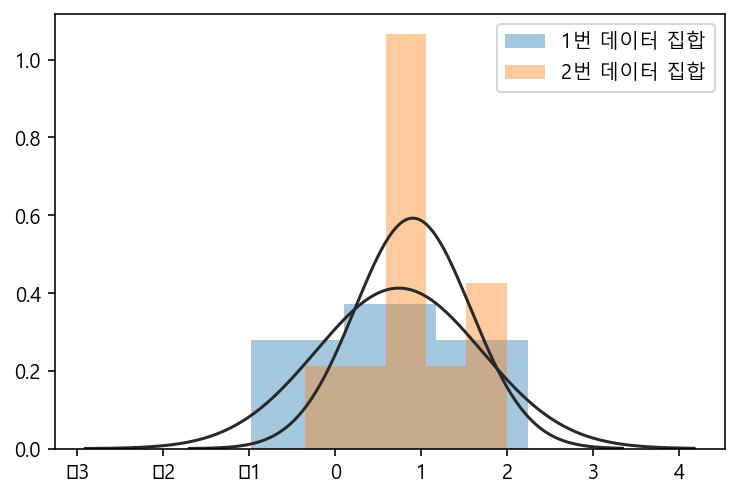

In [32]:
mu_1, mu_2 = 0, 0.5

N_1, N_2 = 10, 10

sigma_1, sigma_2 = 1, 1

np.random.seed(0)

# 위에서 설정한 모수, 샘플 사이즈 지정
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

sns.distplot(x1, kde = False, fit=sp.stats.norm, label='1번 데이터 집합')
sns.distplot(x2, kde = False, fit=sp.stats.norm, label='2번 데이터 집합')
plt.legend()
plt.show()

In [33]:
# 두 데이터 집합의 표본평균값 비교

np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

In [34]:
# 독립표본 t검정

sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

분명 두 데이터 집합을 만들 때 사용한 $\mu$는 0, 0.5로 달랐다. 하지만 독립표본 t검정의 결과인 유의확률을 확인하면 68%로 두 기댓값이 같다는 귀무가설을 기각할 수 없다. 

이 경우는 **2종오류**라고 하며 데이터 수가 증가하면 이러한 오류를 방지할 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: R

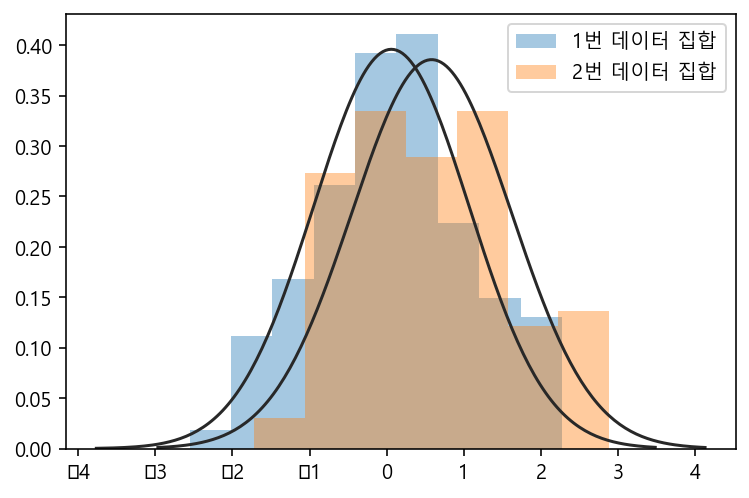

In [38]:
mu_1, mu_2 = 0, 0.5

N_1, N_2 = 100, 100

sigma_1, sigma_2 = 1, 1

np.random.seed(0)

# 위에서 설정한 모수, 샘플 사이즈 지정
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

sns.distplot(x1, kde = False, fit=sp.stats.norm, label='1번 데이터 집합')
sns.distplot(x2, kde = False, fit=sp.stats.norm, label='2번 데이터 집합')
plt.legend()
plt.show()

In [39]:
# 독립표본 t검정

sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-3.597192759749613, pvalue=0.00040634222594880895)

데이터 수를 100, 100개로 증가시킨 결과 유의확률이 0.04%로 감소했으며 이 때는 두 모수가 같다는 귀무가설을 기각할 수 있다

연습문제)

두 반의 학생들의 점수를 이용해 어떤 반의 실력이 더 좋다고 할 수 있겠는가?

In [40]:
class_A = [80 ,75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
class_B = [80, 85, 70, 80, 35, 55, 80]

np.mean(class_A), np.mean(class_B)

(74.16666666666667, 69.28571428571429)

두 반의 평균성적만을 놓고 보자면 A반이 더 잘했다고 할 수 있다.

In [41]:
sp.stats.ttest_ind(class_A, class_B, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

하지만 독립표본 t검정을 수행하면 유의확률이 56%로 두 분포의 모수가 같다는 귀무가설을 채택할 수 있다.

따라서 두 반의 실력은 같다고 볼 수 있다.

## 등분산검정

독립표본 t검정의 경우 equal_var 파라미터에 두 분포의 분산이 같은지를 지정할 수 있다.

앞선 예제에서는 두 분포의 분산이 같은지 다른지 알 수 없었기에 일단 False로 놓고 검정을 수행했었다.

등분산검정은 두 데이터 집합의 분산이 같은지를 확인하는 검정이다.

검정 방법은 아래와 같다.

- bartlett
- fligner
- levene

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: R

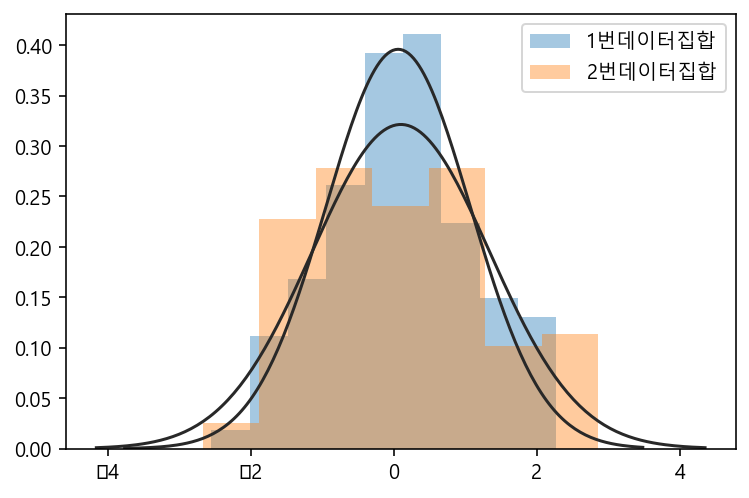

In [43]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2

np.random.seed(0)

x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)

sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번데이터집합')
sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번데이터집합')
plt.legend()
plt.show()

In [44]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [45]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [46]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

위의 세가지 검정을 진행한 결과 유의확률은 위와 같다.

유의수준 1% 기준에서 bartlett 검정은 두 데이터 집합의 분산이 같다고 계산한다.

하지만 fligner, levene 검정은 두 데이터 집합이 다르다고 계산한다.

여기서 어떤 검정을 사용할지는 사람의 개입이 필요하다.

## 정규성검정

회귀분석에서는 확률분포가 가우시안 정규분포를 따르는지 아닌지를 확인하는 것이 가장 중요하다. 이러한 검정을 정규성검정이라 한다.(nomarlity test)

**사이파이에서 제공하는 정규성검정 명령**

- 콜모고르프-스미르노프검정(KS, Kolmogorov-Smirnov test) : stats.ks_2samp
- 샤피로-윌크 검정(Shaprio-Wilk test) : stats.shapiro
- 앤더스-달링 검정(Anderson-Darling test) : stats.anderson
- 다고스티노 K-제곱 검정(D'Agostino's K-squared test) : stats.mstatsnormaltest

**스탯츠모델스에서 제공하는 정규성검정 명령**

- 콜모고르프-스미르노프 검정(Kolmogorov-Smirnov test) : Statsmodels.stats.diagnostic.kstest_normal
- 옴니버스 검정(Omnibus Normality test) : Stats.models.stats.stattools.omni_normtest
- 자크-베라 검정(Jarque-Bera test) : Stats.models.stats.stattools.jarque_bera
- 릴리포스 검정(Lilliefors test) : Stats.models.stats.diagnostic.lillifors

KS검정은 사실 정규성검정에만 국한된 검정 방법은 아니다. KS검정은 두 표본이 같은 분포를 따르는지 확인하는 검정으로 하나의 분포를 정규분포로 놓고 본다면 나머지 하나의 분포가 정규분포를 따르는지 확인할 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


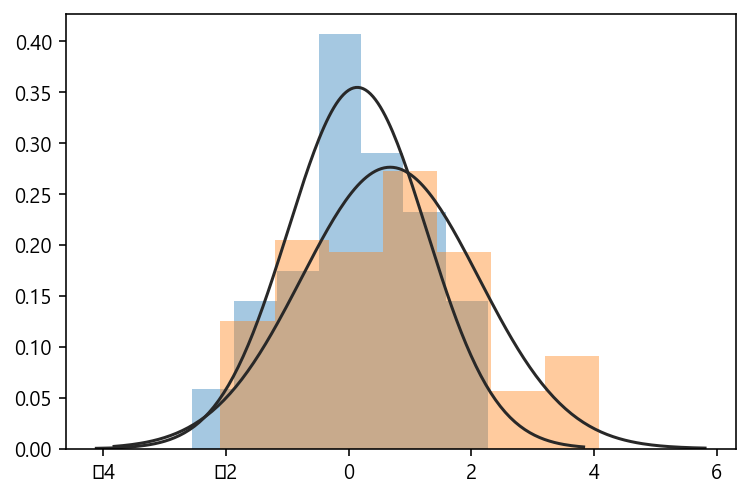

In [55]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)

In [56]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.23, pvalue=0.05550723364321564)

ks검정의 결과로 유의확률이 5.55%로 확인된다. 유의수준이 10%라면 두 분포는 서로 다른 분포라고 할 수 있다.

(귀무가설 : 두 분포는 같은 분포이다.)